
# 🎯 Actividad Práctica — Sesión 2 (45–50 min)
Este notebook guía la práctica usando el archivo **`datos_estudiantes_200_eda.csv`**.

**Duración total sugerida:** 50–60 min



## ⏱️ (5 min) Cargar dataset
Sube `datos_estudiantes_200_eda.csv` o genera uno de ejemplo si no lo tienes.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving datos_estudiantes_200_eda.csv to datos_estudiantes_200_eda.csv


In [2]:

# from google.colab import files
# uploaded = files.upload()  # selecciona datos_estudiantes_200_eda.csv si lo tienes

import pandas as pd
df = pd.read_csv("datos_estudiantes_200_eda.csv")
df.head()


,ID,Nombre,Edad,Carrera,Seccion,Nota_Final,Asistencia_%,Aprobado
0,1,Estudiante1,36,Ingeniería,C,5.4,73.0,True
1,2,Estudiante2,30,Ingeniería,A,5.8,75.0,True
2,3,Estudiante3,21,Física,A,5.7,88.0,True
3,4,Estudiante4,37,Computación,A,3.5,79.0,False
4,5,Estudiante5,30,Computación,B,6.8,90.0,True



## ⏱️ (8–10 min) 1) Diagnóstico de calidad de datos
- ¿Cuántos **duplicados** hay?  
- ¿Cuántos **valores faltantes** por columna?  
- ¿Hay columnas con **tipos inconsistentes**?


In [3]:

dup_count = df.duplicated().sum()
print("Duplicados:", dup_count)

print("\nFaltantes por columna:")
print(df.isna().sum())

print("\nTipos de datos:")
df.dtypes


Duplicados: 5

Faltantes por columna:
ID               0
Nombre           0
Edad             0
Carrera          3
Seccion          0
Nota_Final      17
Asistencia_%     7
Aprobado         0
dtype: int64

Tipos de datos:


,0
ID,int64
Nombre,object
Edad,int64
Carrera,object
Seccion,object
Nota_Final,object
Asistencia_%,object
Aprobado,bool



## ⏱️ (12–15 min) 2) Limpieza mínima viable
- **Normaliza** `Nota_Final` (coma→punto, 'NA'→NaN) y `Asistencia_%` (quita '%', 's/d'→NaN).  
- **Elimina duplicados.**  
- **Imputa** valores numéricos con **mediana** y categóricos con **moda**.


In [4]:

import numpy as np

work = df.copy()

# Normalizaciones
work["Nota_Final"] = pd.to_numeric(work["Nota_Final"].astype(str).str.replace(",", ".", regex=False)
                                   .replace({"NA": np.nan, "NaN": np.nan}), errors="coerce")
work["Asistencia_%"] = pd.to_numeric(work["Asistencia_%"].astype(str).str.replace("%", "", regex=False)
                                     .replace({"s/d": np.nan, "S/D": np.nan}), errors="coerce")

# Duplicados
work = work.drop_duplicates()

# Imputaciones simples (mediana / moda)
for col in ["Nota_Final", "Asistencia_%"]:
    med = work[col].median(skipna=True)
    work[col] = work[col].fillna(med)

if "Carrera" in work.columns:
    moda = work["Carrera"].mode(dropna=True)
    if len(moda) > 0:
        work["Carrera"] = work["Carrera"].fillna(moda.iloc[0]).astype(str).str.strip().str.title()

if "Nombre" in work.columns:
    work["Nombre"] = work["Nombre"].astype(str).str.strip()

work.isna().sum()


,0
ID,0
Nombre,0
Edad,0
Carrera,0
Seccion,0
Nota_Final,0
Asistencia_%,0
Aprobado,0



## ⏱️ (8–10 min) 3) Outliers
- Considera rango válido de `Nota_Final`: **1.0 a 7.0**.  
- Ajusta mediante **recorte (cap)** o elimina filas fuera de rango (tu decisión).


In [5]:

out_mask = (work["Nota_Final"] < 1.0) | (work["Nota_Final"] > 7.0)
print("Outliers detectados:", int(out_mask.sum()))

# Recorte (cap) como estrategia simple
work.loc[work["Nota_Final"] < 1.0, "Nota_Final"] = 1.0
work.loc[work["Nota_Final"] > 7.0, "Nota_Final"] = 7.0


Outliers detectados: 5



## ⏱️ (10–12 min) 4) Resumen y checks
- Revisa `.describe()` y confirma que las transformaciones se aplicaron.


In [6]:
work.describe(include='all')

,ID,Nombre,Edad,Carrera,Seccion,Nota_Final,Asistencia_%,Aprobado
count,202.000000,202,202.000000,202,202,202.000000,202.000000,202
unique,NaN,200,NaN,7,3,NaN,NaN,2
top,NaN,Estudiante6,NaN,Física,A,NaN,NaN,True
freq,NaN,2,NaN,40,88,NaN,NaN,150
mean,100.341584,NaN,28.361386,NaN,NaN,4.927723,74.064356,NaN
std,58.142107,NaN,6.183198,NaN,NaN,1.242379,14.089296,NaN
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,50.000000,NaN
25%,50.250000,NaN,23.000000,NaN,NaN,4.100000,63.000000,NaN
50%,100.500000,NaN,28.000000,NaN,NaN,4.900000,74.000000,NaN
75%,150.750000,NaN,33.000000,NaN,NaN,5.800000,86.000000,NaN



## ⏱️ (10–12 min) 5) Visualizaciones rápidas
- Histograma de **Nota_Final**.  
- Histograma de **Asistencia_%**.  
- **Boxplot** de `Nota_Final` por `Carrera`.


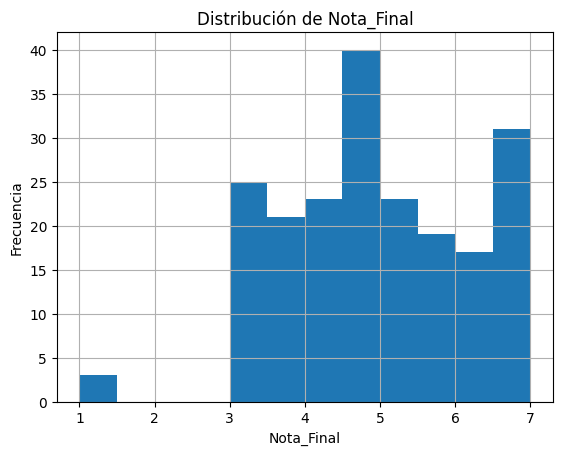

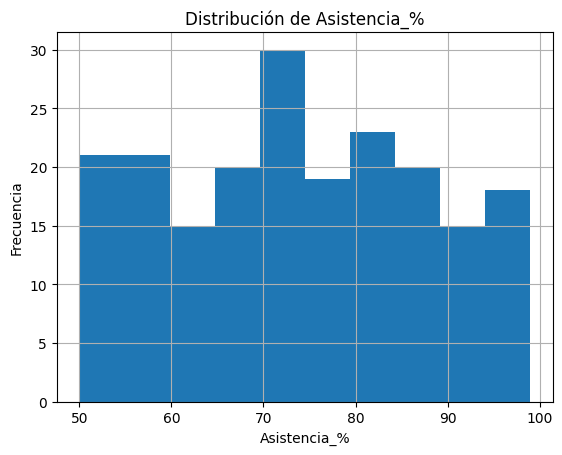

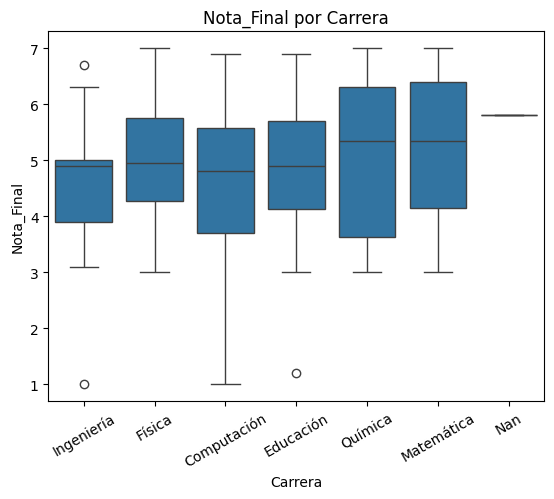

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
work["Nota_Final"].hist(bins=12)
plt.title("Distribución de Nota_Final"); plt.xlabel("Nota_Final"); plt.ylabel("Frecuencia")
plt.show()

plt.figure()
work["Asistencia_%"].hist(bins=10)
plt.title("Distribución de Asistencia_%"); plt.xlabel("Asistencia_%"); plt.ylabel("Frecuencia")
plt.show()

plt.figure()
sns.boxplot(data=work, x="Carrera", y="Nota_Final")
plt.title("Nota_Final por Carrera"); plt.xlabel("Carrera"); plt.ylabel("Nota_Final")
plt.xticks(rotation=30)
plt.show()



## ✍️ (3–5 min) 6) Conclusión de la actividad
Escribe 3 hallazgos relevantes sobre la calidad de los datos y la distribución de variables:
- Hallazgo 1: …  
- Hallazgo 2: …  
- Hallazgo 3: …  
